<div style="text-align: center;">
    <h1>Master Data Science, Big Data & Business Analytics</h1>
</div>

<div style="text-align: center;">
    <h2>Trabajo Programacion Python Avanzado</h2>
</div>

1. Importar todas las librerías necesarias

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random


2. Inicializar algunas variables que después modificaremos

In [ ]:
df = None
dataset = []
lista = []
# diccionarios que usaremos mas adelante
OSs = {'L':'Linux', 'S':'Solaris', 'A':'AIX', 'H':'HP-UX'}
entornos = {'D' : 'Development', 'I':'Integration', 'T':'Testing', 'S':'Staging', 'P':'Production'}
paises = {'NOR':'Norway', 'FRA':'France', 'ITA':'Italy', 'ESP':'Spain', 'DEU': 'Germany', 'IRL': 'Ireland'}

3. Crear una función para generar los hostnames en base a unas reglas.

In [18]:
def set_hostnames(number_of_hosts: int):
    '''Funcion para generar set con los hostnames
    Se incorpora validacion de cantidad maxima de nodos, con mensaje de error al superar los 999'''
    
    global lista
    lista = [] 
    node_counters = {}

    prop_OS = [0.4, 0.3, 0.2, 0.1]
    prop_entorno = [0.1, 0.1, 0.25, 0.25, 0.3]
    prop_pais = [0.06, 0.09, 0.16, 0.16, 0.23, 0.3]

    for i in range(number_of_hosts):
        os = np.random.choice(['L', 'S', 'A', 'H'], p = prop_OS)
        entorno = np.random.choice(['D', 'I', 'T', 'S', 'P'], p = prop_entorno)
        pais = np.random.choice(['NOR', 'FRA', 'ITA', 'ESP', 'DEU', 'IRL'], p= prop_pais)
        key = os + entorno + pais

        node_count = node_counters.get(key, 1)
        
        node = str(node_count).zfill(3)

        hostname = key + node
        lista.append(hostname)

        node_counters[key] = node_count + 1

    return lista


4. Crear una función para obtener el nombre del SO

In [19]:
def get_os(hostname: str) -> str:
    '''Funcion que permite identificar el Sistema Operativo a partir del hostname'''
    try:
        return OSs[hostname[0]]
    except KeyError:
        return 'Unknown'


5. Crear una función para obtener el nombre del entorno.

In [20]:
def get_environment(hostname: str) -> str:
        '''Funcion que permite identificar el entorno a partir del hostname'''
        try:
            return entornos[hostname[1]]
        except KeyError:
            return 'Unknown'
        

6. Creamos una función para obtener el nombre del país.

In [21]:
def get_country(hostname: str) -> str:
        '''Funcion que permite identificar el entorno a partir del hostname'''
        try:
            return paises[hostname[2:5]]
        except KeyError:
            return 'Unknown'
        

7. Crear una función para generar el DataFrame

In [22]:
def set_dataframe(count: int):
    '''Función para generar un DataFrame a partir de los hostnames.'''
    global df  
    global dataset  
    
    lista = set_hostnames(count)  
    
    for hostname in lista:
        os = get_os(hostname)  # Obtener el sistema operativo
        environment = get_environment(hostname)  # Obtener el entorno
        country = get_country(hostname)  # Obtener el país
        node = int(hostname[-3:])  # Extraer el número del nodo como int
        
        dataset.append({
            'hostname': hostname,
            'os': os,
            'environment': environment,
            'country': country,
            'node': node
        })
    
    df = pd.DataFrame(dataset)
    return df


8. Crear el DataFrame

In [23]:
df = set_dataframe(1500)

df

,hostname,os,environment,country,node
0,APDEU001,AIX,Production,Germany,1
1,LSDEU001,Linux,Staging,Germany,1
2,ATDEU001,AIX,Testing,Germany,1
3,HSESP001,HP-UX,Staging,Spain,1
4,SIITA001,Solaris,Integration,Italy,1
...,...,...,...,...,...
1495,LSIRL049,Linux,Staging,Ireland,49
1496,LDNOR005,Linux,Development,Norway,5
1497,LPDEU046,Linux,Production,Germany,46
1498,LSDEU024,Linux,Staging,Germany,24


In [24]:
# Prueba para verificar que los nodos se numeraron de manera correcta
print(df[(df['os'] == 'Solaris') & (df['country']=="Italy") & (df['environment']=='Testing')].head())
print(df[(df['os'] == 'Solaris') & (df['country']=="Italy") & (df['environment']=='Testing')].tail())

     hostname       os environment country  node
50   STITA001  Solaris     Testing   Italy     1
69   STITA002  Solaris     Testing   Italy     2
151  STITA003  Solaris     Testing   Italy     3
253  STITA004  Solaris     Testing   Italy     4
320  STITA005  Solaris     Testing   Italy     5
      hostname       os environment country  node
1087  STITA013  Solaris     Testing   Italy    13
1132  STITA014  Solaris     Testing   Italy    14
1275  STITA015  Solaris     Testing   Italy    15
1370  STITA016  Solaris     Testing   Italy    16
1480  STITA017  Solaris     Testing   Italy    17


9. Guardar el DataFrame generado en un fichero CSV

In [25]:
df.to_csv('hosts.csv', header=True, index=False)
hosts_df = pd.read_csv('hosts.csv')
hosts_df

,hostname,os,environment,country,node
0,APDEU001,AIX,Production,Germany,1
1,LSDEU001,Linux,Staging,Germany,1
2,ATDEU001,AIX,Testing,Germany,1
3,HSESP001,HP-UX,Staging,Spain,1
4,SIITA001,Solaris,Integration,Italy,1
...,...,...,...,...,...
1495,LSIRL049,Linux,Staging,Ireland,49
1496,LDNOR005,Linux,Development,Norway,5
1497,LPDEU046,Linux,Production,Germany,46
1498,LSDEU024,Linux,Staging,Germany,24


10. Generar un único gráfico, agrupando para cada país (country) los  entornos

<Axes: xlabel='country'>

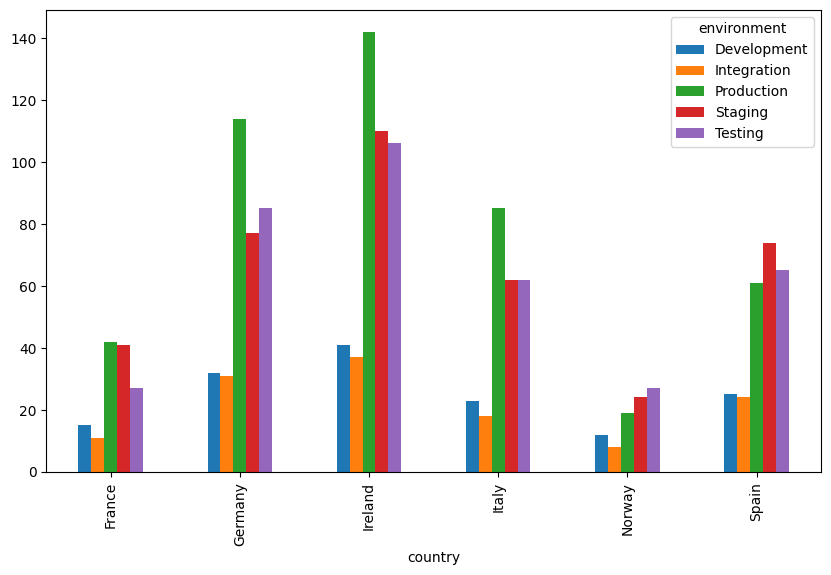

In [26]:
'''Grafico solicitado'''

p = hosts_df.groupby('country')['environment'].value_counts().unstack(fill_value=0)

p.plot(kind='bar', figsize=(10, 6))


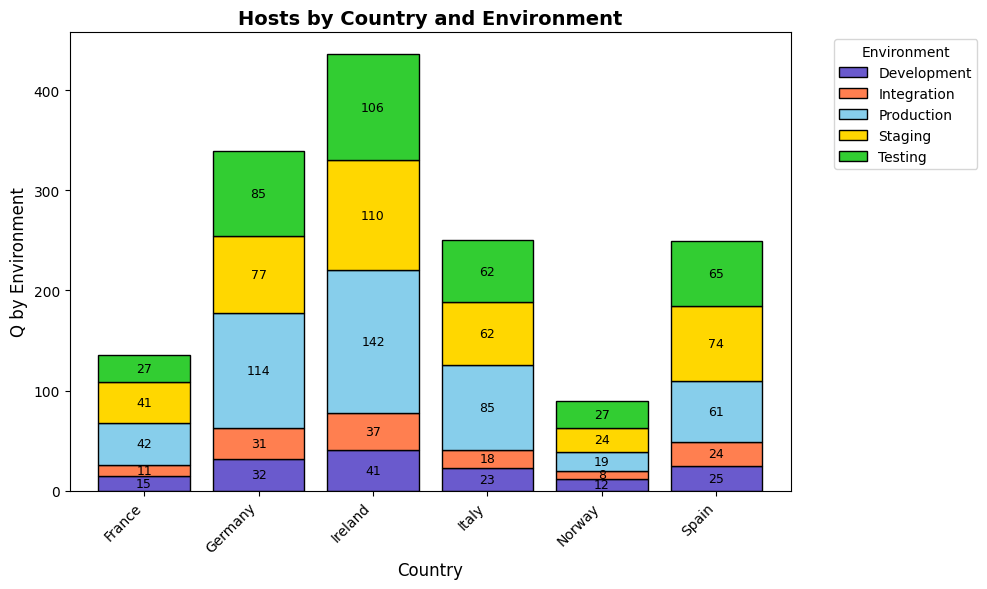

In [27]:
'''Version alternativa del grafico anterior'''

# Generar el gráfico
p = hosts_df.groupby('country')['environment'].value_counts().unstack(fill_value=0)
ax = p.plot(
    kind='bar', 
    stacked=True, 
    color=['#6a5acd', '#ff7f50', '#87ceeb', '#ffd700', '#32cd32'], 
    figsize=(10, 6), 
    edgecolor='black',
    width=0.8)

# Títulos y etiquetas
plt.xlabel('Country', fontsize=12)
plt.ylabel('Q by Environment', fontsize=12)
plt.title('Hosts by Country and Environment', fontsize=14, weight='bold')

# Mejorar etiquetas de los ejes
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Ajustar la leyenda
plt.legend(title='Environment', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Añadir etiquetas de valores en las barras
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=9, color='black')

plt.tight_layout()

plt.show()


11. Crear una figura con 4 gráficos en una malla de 2 filas y 2 columnas

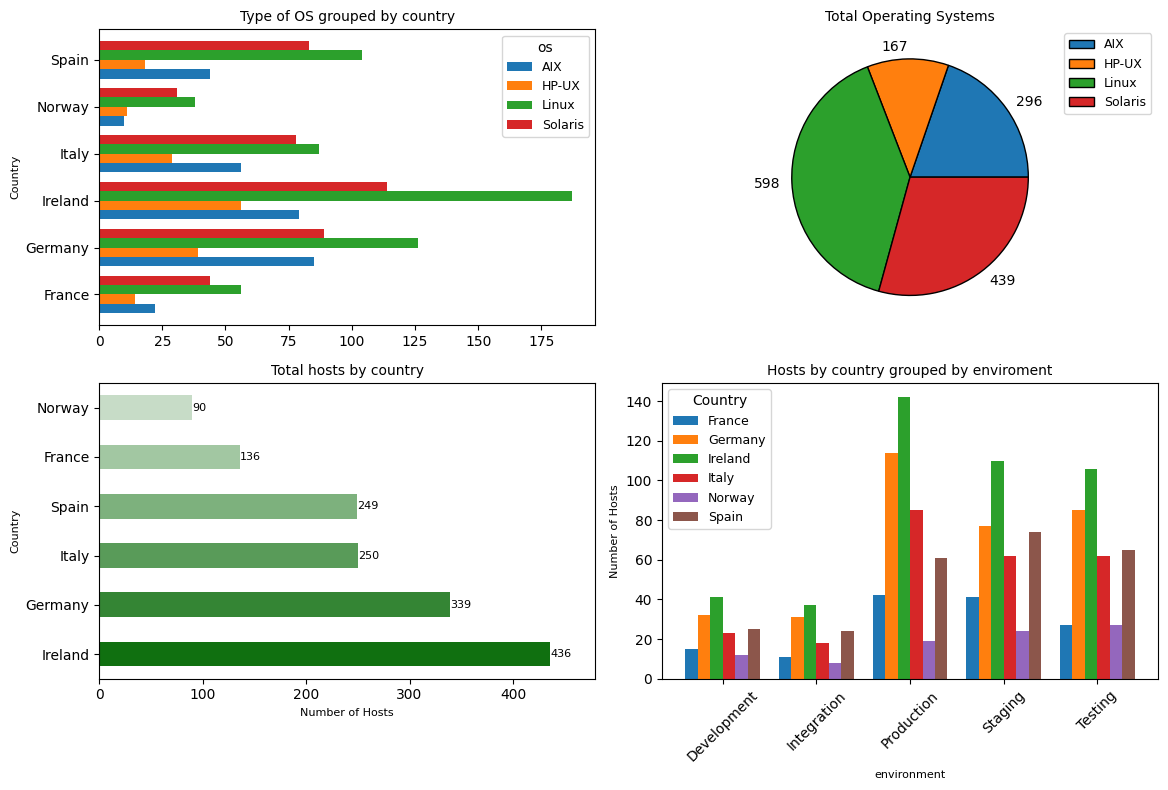

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Gráfico 1: Total de Hosts agrupados por OS y Pais en barras orizonales
bar = hosts_df.groupby('country')['os'].value_counts().unstack(fill_value=0)
bar.plot(kind='barh', ax=axs[0, 0], width = 0.8)
axs[0, 0].set_title('Type of OS grouped by country', fontsize=10)
axs[0, 0].set_ylabel('Country', fontsize=8)
axs[0, 0].legend(title = 'os',fontsize=9)

# Gráfico 2: Total de Sistemas Operativos en un gráfico de pastel
pie = hosts_df['os'].value_counts()
sorted_pie = pie.sort_index()
axs[0, 1].set_title('Total Operating Systems', fontsize=10)
labels = [str(value) for value in sorted_pie.values]
axs[0, 1].pie(sorted_pie,
              labels=labels, 
              autopct='',
              wedgeprops={'edgecolor': 'black', 'linewidth': 1}) 
axs[0, 1].legend(sorted_pie.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1.7),fontsize=9)

# Grafico 3: Total de Hosts por pais en barras horizontales
axs[1, 0].set_title('Total hosts by country', fontsize=10)
axs[1, 0].set_xlabel('Number of Hosts', fontsize=8)
axs[1, 0].set_ylabel('Country', fontsize=8)
bar2 = hosts_df['country'].value_counts().sort_values()
colors = sns.light_palette("green", n_colors=len(bar2)+1, as_cmap=False)[1:]
sns.barplot(y=bar2.index, 
            x=bar2.values, 
            ax=axs[1, 0], 
            hue=bar2.index, 
            palette=colors, 
            width=0.5)
axs[1, 0].set_xlim(0, (hosts_df['country'].value_counts().max()*1.1))
for index, value in enumerate(bar2.values):
    axs[1, 0].text(value, index, f'{value}', va='center',fontsize=8)

# Grafico 4: Total de Hosts agrupados por pais y environment
axs[1, 1].set_title('Hosts by country grouped by enviroment',fontsize=10)
bar3 = hosts_df.groupby('environment')['country'].value_counts().unstack(fill_value=0).sort_index(ascending=True)
axs[1, 1].set_xlabel('environment',fontsize=8)
axs[1, 1].set_ylabel('Number of Hosts', fontsize=8)
bar3.plot(kind='bar', ax=axs[1, 1], width = 0.8)
axs[1, 1].tick_params(axis='x', rotation=45, labelsize=10)
axs[1, 1].legend(title = 'Country',fontsize=9)


fig.tight_layout()
plt.show()

*Se crea visualizacion adicional para observar que las proporciones de OS, Pais y Environment se crearon correctamente*

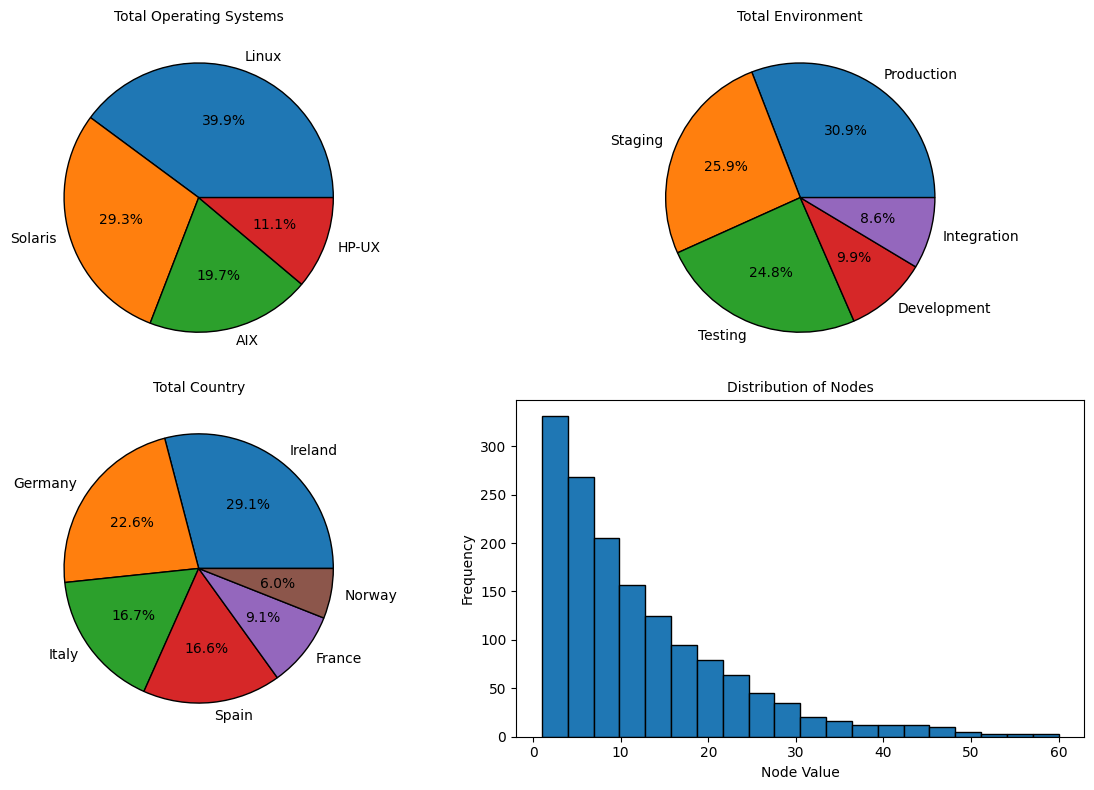

In [29]:
# Crear la figura y los ejes
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Gráfico 1: Total de Hosts agrupados por OS
os_counts = hosts_df['os'].value_counts()
axs[0, 0].set_title('Total Operating Systems', fontsize=10)
axs[0, 0].pie(os_counts, labels=os_counts.index, autopct='%1.1f%%', 
               wedgeprops={'edgecolor': 'black', 'linewidth': 1})


# Gráfico 2: Total de Hosts por Entorno
environment_counts = hosts_df['environment'].value_counts()
axs[0, 1].set_title('Total Environment', fontsize=10)
axs[0, 1].pie(environment_counts, labels=environment_counts.index, autopct='%1.1f%%', 
               wedgeprops={'edgecolor': 'black', 'linewidth': 1})


# Gráfico 3: Total de Hosts por Pais
country_counts = hosts_df['country'].value_counts()
axs[1, 0].set_title('Total Country', fontsize=10)
axs[1, 0].pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', 
               wedgeprops={'edgecolor': 'black', 'linewidth': 1})


# Gráfico 4: Histograma de Nodos
axs[1, 1].set_title('Distribution of Nodes', fontsize=10)
axs[1, 1].hist(hosts_df['node'].astype(int), bins=20, edgecolor='black', linewidth=1)
axs[1, 1].set_xlabel('Node Value')
axs[1, 1].set_ylabel('Frequency')

# Ajustar los espacios entre los subgráficos
plt.tight_layout()
plt.show()
